In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files
from google.colab import drive
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =pd.read_csv('/content/drive/MyDrive/Project-code-2023/EXP-wav/data/EXT_data.csv')


In [ ]:
df.head()

,f0_mean,f0_std_deviation,hnr,jitter_relative,jitter_absolute,jitter_rap,jitter_ppq5,shimmer_relative,shimmer_localDb,shimmer_apq3,...,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label
0,183.529521,61.706883,12.861531,0.027656,0.000152,0.012301,0.013581,0.114328,1.142765,0.046059,...,36.622796,4.381283,-51.226759,-21.675977,-7.684882,2.750536,3.849808,8.752428,0.208220,0.0
1,191.411023,37.924675,11.191856,0.016322,0.000085,0.006892,0.007165,0.078771,0.735034,0.028917,...,22.481075,22.888370,-16.576583,-0.005128,-22.860485,-1.250413,-8.307896,-7.638449,0.425119,0.0
2,124.404377,30.757396,12.064737,0.021813,0.000176,0.008341,0.009774,0.105201,1.003543,0.041027,...,28.954005,9.337745,-5.015254,2.583235,-14.572674,0.940267,-5.533343,-1.466902,-9.954152,1.0
3,129.460489,51.693216,13.403747,0.026465,0.000208,0.010665,0.011645,0.104704,1.002982,0.040266,...,31.359476,33.517867,-34.057906,-12.091941,-11.613016,-3.418581,-15.054758,1.423258,7.775569,0.0
4,117.594896,60.504173,10.182373,0.039906,0.000150,0.017347,0.018509,0.127223,1.232997,0.048521,...,34.587242,35.904514,-7.150892,1.812661,-14.583591,4.764799,11.591349,-2.477217,8.576886,1.0


In [ ]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 25
Number of Instances In Dataset :  37


In [ ]:
# Exploring Information About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   f0_mean           37 non-null     float64
 1   f0_std_deviation  37 non-null     float64
 2   hnr               37 non-null     float64
 3   jitter_relative   37 non-null     float64
 4   jitter_absolute   37 non-null     float64
 5   jitter_rap        37 non-null     float64
 6   jitter_ppq5       37 non-null     float64
 7   shimmer_relative  37 non-null     float64
 8   shimmer_localDb   37 non-null     float64
 9   shimmer_apq3      37 non-null     float64
 10  shimmer_apq5      37 non-null     float64
 11  mfcc_1            37 non-null     float64
 12  mfcc_2            37 non-null     float64
 13  mfcc_3            37 non-null     float64
 14  mfcc_4            37 non-null     float64
 15  mfcc_5            37 non-null     float64
 16  mfcc_6            37 non-null     float64
 17 

In [ ]:
df.describe()

,f0_mean,f0_std_deviation,hnr,jitter_relative,jitter_absolute,jitter_rap,jitter_ppq5,shimmer_relative,shimmer_localDb,shimmer_apq3,...,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,169.108491,45.184614,13.379464,0.023551,0.000145,0.010216,0.010979,0.094183,0.925884,0.035782,...,26.983006,24.534434,-16.038266,-2.344370,-12.186701,-2.746870,0.003344,-1.294651,1.061976,0.432432
std,31.054132,10.721563,1.821215,0.005570,0.000052,0.002904,0.002928,0.015417,0.138957,0.008192,...,12.726663,14.297257,12.318881,13.249363,11.363720,9.503643,9.653106,7.705090,8.945486,0.502247
min,101.441520,21.700405,10.182373,0.013970,0.000077,0.005358,0.005803,0.061226,0.635766,0.023806,...,-9.612589,-1.269567,-51.226759,-24.561546,-35.680011,-24.398019,-28.457065,-16.292199,-16.042029,0.000000
25%,139.925796,37.924675,12.069858,0.020194,0.000112,0.008341,0.009115,0.082022,0.806059,0.029279,...,20.603586,12.465326,-20.877052,-11.787999,-17.471027,-11.045900,-5.214899,-6.654626,-5.702192,0.000000
50%,180.955867,47.094601,13.103552,0.022866,0.000131,0.009922,0.010434,0.095637,0.942493,0.035398,...,25.994576,25.461889,-15.199401,-1.961568,-13.068323,0.028050,0.381197,-1.466902,1.554965,0.000000
75%,191.411023,51.693216,14.448211,0.027047,0.000182,0.011550,0.013075,0.104713,1.003543,0.040266,...,36.367023,35.371636,-10.664171,5.476300,-3.977438,5.188163,4.421726,3.519430,8.576886,1.000000
max,214.506157,62.770765,17.586959,0.039906,0.000287,0.017347,0.018509,0.127223,1.232997,0.053177,...,51.931076,50.608532,9.001705,34.894468,19.013661,16.090623,19.289492,20.126116,17.294757,1.000000


In [ ]:
X = df.drop(columns='label')
y = pd.DataFrame(df['label'])

print(f'X shape : {X.shape}')
print(f'y shape : {y.shape}')

X shape : (37, 24)
y shape : (37, 1)


In [ ]:
#solve imbalancing issue ..

from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC(categorical_features=[0, 2, 4, 6, 8, 10, 12, 14], random_state=0)
X_resampled, y_resampled = smotenc.fit_resample(X, y)

print(f"Before oversampling: {X.shape}, {y.shape}")
print(f"After oversampling: {X_resampled.shape}, {y_resampled.shape}")

Before oversampling: (37, 24), (37, 1)
After oversampling: (42, 24), (42, 1)


In [ ]:
y_resampled.value_counts()

label
0.0      21
1.0      21
dtype: int64

In [ ]:
#split the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify= y, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (27, 24)
X_test shape: (10, 24)
y_train shape: (27, 1)
y_test shape: (10, 1)


In [ ]:
#scale the datset..

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Multi Layer Perceptron**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm

In [ ]:
class ParkinsonData(Dataset):
    def __init__(self, X, y):
        self.n_samples = X.shape[0]
        # convert DataFrame to numpy array
        y = y.to_numpy()
        # convert numpy to tensor
        self.x_data = torch.from_numpy(X.astype(np.float32)) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(y.astype(np.float32)) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [ ]:
# Create data
train_data = ParkinsonData(X_train, y_train)
test_data = ParkinsonData(X_test, y_test)

In [ ]:
# get first sample of train data
x_sample, y_sample = train_data[0]
print(f'10 first element of x_sample : \n{x_sample[:10]} \nand y_sample : \n{y_sample}')
print(f'x_sample shape : {x_sample.shape} and y_sample shape : {y_sample}')

10 first element of x_sample : 
tensor([ 0.1824,  0.1153,  0.2285, -0.0897, -0.2898, -0.0127,  0.0367, -0.1442,
        -0.3040, -0.4074]) 
and y_sample : 
tensor([0.])
x_sample shape : torch.Size([24]) and y_sample shape : tensor([0.])


In [ ]:
# set parameters
BATCH_SIZE=16
input_size = X.shape[1]
output_size = 1
num_epoch = 100
learning_rate = 0.01

In [ ]:
# Create dataloaders
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = True) # 
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = True)

print(f'length of train data is : {len(train_data)} and length of train loader is : {len(train_loader)}')
print(f'length of test data is : {len(test_data)} and length of test loader is : {len(test_loader)}')

length of train data is : 27 and length of train loader is : 2
length of test data is : 10 and length of test loader is : 1


In [ ]:
# get an example of train loader
example= next(iter(train_loader))

# unpack example
sample_x,sample_y = example
print(f'samples shape : {sample_x.shape} ,labels shape : {sample_y.shape}')

samples shape : torch.Size([16, 24]) ,labels shape : torch.Size([16, 1])


In [ ]:
# create neural network class
class NeuralNet(nn.Module):
  def __init__(self, input_size, num_classes):
    super(NeuralNet, self).__init__()
    self.fc = nn.Sequential(
    nn.Linear(input_size, 100),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.Dropout(0.50),
    nn.ReLU(),
    nn.Linear(50, 1),
    nn.Sigmoid())

  def forward(self,x):
    out = self.fc(x)
    return out

In [ ]:
# define a function to calculate accuracy
def accuracy(y_pred, y_act):
  y_pred = torch.round(y_pred)
  correct = (y_pred == y_act)
  acc = correct.sum()/len(correct)
  acc = torch.round(acc*100)
  return acc

# define a function for training a model
def train_fun(model1, train_loader):
  train_epoch_loss = 0
  train_epoch_acc = 0
  model1.train() # train the model
  loop = tqdm(enumerate(train_loader), total = total_step, leave = False)

  for i, batch in loop:
    optimizer.zero_grad()
    x, y = batch # retrieve x and y
    x = x.to(device)
    y = y.to(device)
    y_pred = model1(x)
    loss_train = criterion(y_pred, y)
    acc_train = accuracy(y_pred, y)
    loss_train.backward()
    optimizer.step()

    train_epoch_loss += loss_train.item()
    train_epoch_acc += acc_train.item()
    loop.set_description(f'Epoch : [{epoch}/{num_epoch}]')
    loop.set_postfix(loss = loss_train.item(), accuracy = acc_train.item()) 
  
  train_loss.append(train_epoch_loss/len(train_loader))
  train_acc.append(train_epoch_acc/len(train_loader))  
      
  # if you want to monitor your model in tensorboard   
  writer.add_scalar('training loss',train_epoch_loss/len(train_loader) , epoch)
  writer.add_scalar('training accuracy',train_epoch_acc/len(train_loader) , epoch)
  return train_loss, train_acc

# define a function for evaluating model
def evaluate(model1, valid_loader):
  with torch.no_grad():
    model1.eval()
    val_epoch_loss = 0
    val_epoch_acc = 0

    for batch in valid_loader:
      x, y = batch
      x = x.to(device)
      y = y.to(device)
      y_pred_val = model1(x)
      loss_valid = criterion(y_pred_val, y)
      acc_valid = accuracy(y_pred_val, y) 
      val_epoch_loss += loss_valid.item()
      val_epoch_acc += acc_valid.item()

    valid_loss.append(val_epoch_loss/len(valid_loader))
    valid_acc.append(val_epoch_acc/len(valid_loader))  

    writer.add_scalar('validation loss',val_epoch_loss/len(valid_loader) , epoch)
    writer.add_scalar('validation accuracy',val_epoch_acc/len(valid_loader) , epoch)
  return valid_loss, valid_acc

# define a function for evaluating model on test set
def test(model1, test_loader):
  y_pred_test = []
  y_actual_test = []

  model1.eval()
  with torch.no_grad():
    n_true = 0
    n_total = 0
    n_class_correct = [0 for i in range(num_class)]
    n_class_sample = [0 for i in range(num_class)]
  
    for batch in test_loader:
      x, y = batch
      output = model1(x)
      y_predtest = torch.round(output)
      n_true += (y_predtest == y).sum()
      n_total += y.size(0)

      for i in range(len(y_predtest)):
        y_pred_test.append(y_predtest[i])
        y_actual_test.append(y[i].item())

      for i in range(len(y_predtest)):
        lb = int(y[i].item())
        pred = y_predtest[i]
        if pred == lb:
          n_class_correct[lb] += 1
        n_class_sample[lb] += 1   

    print(f'accuracy of network on the {len(test_loader)} data is : {(n_true/n_total) *100}')
  
    for i in range(len(classes)):
      acc = 100.0 * n_class_correct[i] / n_class_sample[i]
      print(f'Accuracy of {classes[i]}: {acc} %')
  
  return y_pred_test, y_actual_test 

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('parkinson')

In [ ]:
fold = StratifiedKFold(2) # shuffle false because we shuffled data in splitting train and test section
cv_scores = {'Accuracy' : []}

for fold, (train_ids, valid_ids) in enumerate(fold.split(X_train, y_train)):
  # sample elements randomly from a give list of ids, no replacement
  train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
  valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_ids)

  # create dataloader for train and valid data in this fold
  trainloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, sampler=train_subsampler)
  validloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, sampler=valid_subsampler)

  model = NeuralNet(input_size, output_size)
  optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
  criterion = nn.BCELoss()
  scheduler = lr_scheduler.StepLR(optimizer, 3, gamma=0.5)

  total_step = len(trainloader)
  train_loss, valid_loss = [], []
  train_acc, valid_acc = [], []

  for epoch in range(num_epoch):
    train_loss, train_acc = train_fun(model, trainloader)
    writer.flush() 
    valid_loss, valid_acc = evaluate(model, validloader)   
    print(f'fold {fold} => train acc : {train_acc[-1]:0.2f}| train loss : {train_loss[-1]:0.2f}| valid acc : {valid_acc[-1]:0.2f}| valid loss : {valid_loss[-1]:0.2f}')
    scheduler.step()

  cv_scores['Accuracy'].append(valid_acc[-1])

fold 0 => train acc : 23.00| train loss : 0.72| valid acc : 50.00| valid loss : 0.69


fold 0 => train acc : 62.00| train loss : 0.68| valid acc : 64.00| valid loss : 0.68


fold 0 => train acc : 69.00| train loss : 0.59| valid acc : 64.00| valid loss : 0.67


fold 0 => train acc : 69.00| train loss : 0.55| valid acc : 64.00| valid loss : 0.66


fold 0 => train acc : 85.00| train loss : 0.51| valid acc : 71.00| valid loss : 0.66


fold 0 => train acc : 85.00| train loss : 0.51| valid acc : 71.00| valid loss : 0.66


fold 0 => train acc : 92.00| train loss : 0.46| valid acc : 71.00| valid loss : 0.66


fold 0 => train acc : 85.00| train loss : 0.43| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.45| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.36| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.39| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.44| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.37| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.39| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.39| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.44| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 100.00| train loss : 0.34| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.40| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.37| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.39| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.36| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.38| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.37| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.37| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.34| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.33| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.36| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.31| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.37| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.33| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.41| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.34| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.36| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.39| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 100.00| train loss : 0.29| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 100.00| train loss : 0.36| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.42| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.38| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 100.00| train loss : 0.31| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.34| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.40| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.37| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 100.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 100.00| train loss : 0.34| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 100.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.40| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.36| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.38| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.41| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.34| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.39| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.34| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.40| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 100.00| train loss : 0.33| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.36| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.33| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.33| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.41| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.42| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.38| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.33| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 100.00| train loss : 0.37| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.36| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.40| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.41| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 100.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.34| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 77.00| train loss : 0.42| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.38| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.41| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.39| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.29| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.34| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.37| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.36| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.42| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.35| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.38| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 100.00| train loss : 0.34| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.37| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 85.00| train loss : 0.41| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 100.00| train loss : 0.33| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.33| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.33| valid acc : 64.00| valid loss : 0.65


fold 0 => train acc : 92.00| train loss : 0.36| valid acc : 64.00| valid loss : 0.65


fold 1 => train acc : 57.00| train loss : 0.70| valid acc : 54.00| valid loss : 0.68


fold 1 => train acc : 64.00| train loss : 0.63| valid acc : 54.00| valid loss : 0.67


fold 1 => train acc : 57.00| train loss : 0.61| valid acc : 69.00| valid loss : 0.66


fold 1 => train acc : 79.00| train loss : 0.55| valid acc : 69.00| valid loss : 0.65


fold 1 => train acc : 79.00| train loss : 0.53| valid acc : 69.00| valid loss : 0.65


fold 1 => train acc : 93.00| train loss : 0.46| valid acc : 69.00| valid loss : 0.64


fold 1 => train acc : 79.00| train loss : 0.53| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.46| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 86.00| train loss : 0.41| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.39| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.37| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.42| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.36| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.43| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.43| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.37| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.38| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 86.00| train loss : 0.38| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.34| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.36| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.37| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.31| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.33| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.36| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.38| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.34| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.39| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 86.00| train loss : 0.39| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 86.00| train loss : 0.38| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 79.00| train loss : 0.43| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 86.00| train loss : 0.41| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.36| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.34| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.37| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.37| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.33| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.32| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 86.00| train loss : 0.38| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.41| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.30| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.40| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.33| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.31| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.30| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.32| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.34| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.40| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.33| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.36| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.36| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.38| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.36| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.33| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.34| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.33| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 71.00| train loss : 0.40| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.36| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.34| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.29| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.41| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.33| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 79.00| train loss : 0.38| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 86.00| train loss : 0.39| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.31| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.33| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.32| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.37| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 86.00| train loss : 0.36| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.36| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 86.00| train loss : 0.40| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 79.00| train loss : 0.33| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.32| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.34| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.38| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.39| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.37| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.32| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.33| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.32| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 86.00| train loss : 0.33| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.37| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.39| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.37| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.36| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 93.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


fold 1 => train acc : 100.00| train loss : 0.35| valid acc : 77.00| valid loss : 0.64


In [ ]:
mean_cv_scores = {k: np.mean(v) for k, v in cv_scores.items()}  
print(f"mean accuracy using 10 foldCV : {mean_cv_scores['Accuracy']:0.2f}")

mean accuracy using 10 foldCV : 70.50


In [ ]:
# create model
model = NeuralNet(input_size, output_size)

# create loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
scheduler = lr_scheduler.StepLR(optimizer, 3, gamma=0.5)
total_step = len(train_loader)

In [ ]:
model

NeuralNet(
  (fc): Sequential(
    (0): Linear(in_features=24, out_features=100, bias=True)
    (1): Dropout(p=0.25, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): Dropout(p=0.5, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=50, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [ ]:
train_loss, train_acc  = [], []
valid_loss, valid_acc = [],[]
num_epoch = 100
for epoch in range(num_epoch):
  train_loss, train_acc = train_fun(model, train_loader)
  valid_loss, valid_acc = evaluate(model, validloader) 

  writer.flush()   
  scheduler.step()

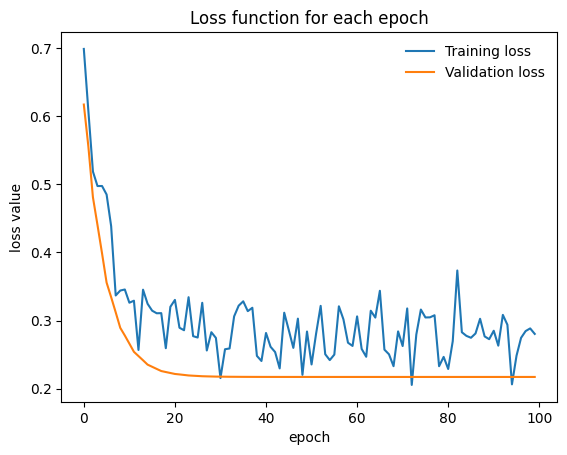

In [ ]:
#Training and validation loss
plt.plot(train_loss, label='Training loss')
plt.plot(valid_loss, label='Validation loss')

plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.title("Loss function for each epoch") 
plt.show()

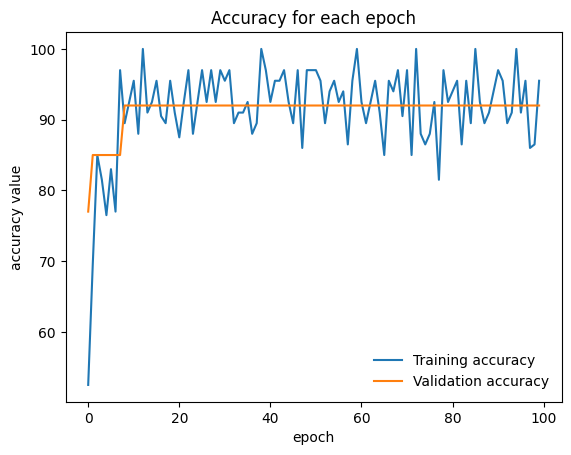

In [ ]:
#Training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(valid_acc, label='Validation accuracy')

plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('accuracy value')
plt.title("Accuracy for each epoch")
plt.show()

In [ ]:
print(f'training loss on last epoch : {train_loss[-1]}')
print(f'validation loss on last epoch : {valid_loss[-1]}')
print('-'*20)
print(f'training accuracy on last epoch : {train_acc[-1]}')
print(f'validation accuracy on last epoch : {valid_acc[-1]}')

training loss on last epoch : 0.2804068401455879
validation loss on last epoch : 0.21724653244018555
--------------------
training accuracy on last epoch : 95.5
validation accuracy on last epoch : 92.0


In [ ]:
#test the model
num_class =2
classes = ['0', '1']

y_pred_test, y_actual_test = test(model, test_loader)

accuracy of network on the 1 data is : 80.0
Accuracy of 0: 83.33333333333333 %
Accuracy of 1: 75.0 %


In [ ]:
y_actual_test = [int(y) for y in y_actual_test]  # Convert to list of integers
y_pred_test = [int(y.item()) for y in y_pred_test]  # Convert tensor to integer and then to list of integers

In [ ]:
print(classification_report(y_actual_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.75      0.75      0.75         4

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



In [ ]:
print(confusion_matrix(y_actual_test, y_pred_test))


[[5 1]
 [1 3]]


# **Autoencoder+MLP**

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, input_size):
        super(Autoencoder, self).__init__()
        # Create linear encoder with Linear layer followed by LeakyReLU activation function
        self.encoder = nn.Sequential(
            torch.nn.Linear(input_size, 1000),
            nn.ReLU(),
            nn.Dropout(0.25),
            torch.nn.Linear(1000, 500),
            nn.ReLU(),
            nn.Dropout(0.25),
            torch.nn.Linear(500, 10),
            nn.ReLU(),
        )

        # Create linear decoder with Linear layer followed by LeakyReLU activation function
        self.decoder = nn.Sequential(
            torch.nn.Linear(10, 500),
            nn.ReLU(),
            nn.Dropout(0.25),
            torch.nn.Linear(500, 1000),
            nn.ReLU(),
            nn.Dropout(0.25),
            torch.nn.Linear(1000, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [ ]:
# define a function for training a model
def train_ae(model1, train_loader):
  train_epoch_loss = 0
  model1.train() # train the model
  loop = tqdm(enumerate(train_loader), total = total_step, leave = False)

  for i, batch in loop:
    optimizer.zero_grad()
    x, y = batch # retrieve x and y
    x = x.to(device)
    _, x_pred = model1(x)
    loss_train = criterion(x_pred, x)
    loss_train.backward()
    optimizer.step()

    train_epoch_loss += loss_train.item()
    loop.set_description(f'Epoch : [{epoch}/{num_epoch}]')
    loop.set_postfix(loss = loss_train.item()) 
  
  train_loss.append(train_epoch_loss/len(train_loader)) 
      
  # if you want to monitor your model in tensorboard   
  writer.add_scalar('training loss',train_epoch_loss/len(train_loader) , epoch)
  return train_loss

# define a function for evaluating model
def evaluate_ae(model1, valid_loader):
  with torch.no_grad():
    model1.eval()
    val_epoch_loss = 0

    for batch in valid_loader:
      x, y = batch
      x = x.to(device)
      _, x_pred_val = model1(x)
      loss_valid = criterion(x_pred_val, x)
      val_epoch_loss += loss_valid.item()

    valid_loss.append(val_epoch_loss/len(valid_loader)) 

    writer.add_scalar('validation loss',val_epoch_loss/len(valid_loader) , epoch)
  return valid_loss

# define a function for evaluating model on test set
def test_ae(model1, test_loader):
  model1.eval()
  with torch.no_grad():
    test_epoch_loss = 0

    for batch in test_loader:
      x, y = batch
      _, x_pred_test = model1(x)
      loss_test = criterion(x_pred_test, x)
      test_epoch_loss += loss_test.item()
    
    test_loss.append(test_epoch_loss/len(test_loader))
  return test_loss

In [ ]:
#Parameter tuning using Cross validation

input_size = X.shape[1]
num_epoch = 100
learning_rate = 0.01

In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('parkinson_ae')

In [ ]:
fold = StratifiedKFold(2) # shuffle false because we shuffled data in splitting train and test section

for fold, (train_ids, valid_ids) in enumerate(fold.split(X_train, y_train)):
  # sample elements randomly from a give list of ids, no replacement
  train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
  valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_ids)

  # create dataloader for train and valid data in this fold
  trainloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, sampler=train_subsampler)
  validloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, sampler=valid_subsampler)

  model = Autoencoder(input_size)
  optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
  criterion = nn.MSELoss()
  scheduler = lr_scheduler.StepLR(optimizer, 3, gamma=0.3)

  total_step = len(trainloader)
  train_loss, valid_loss = [], []

  for epoch in range(num_epoch):
    train_loss = train_ae(model, trainloader)
    writer.flush() 
    valid_loss = evaluate_ae(model, validloader)   
    print(f'fold {fold} => train loss : {train_loss[-1]:0.2f}| valid loss : {valid_loss[-1]:0.2f}')
    scheduler.step()

fold 0 => train loss : 1.38| valid loss : 0.99


fold 0 => train loss : 1.04| valid loss : 0.97


fold 0 => train loss : 1.05| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01

fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01

fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01

fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01

fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 0 => train loss : 1.07| valid loss : 1.01


fold 1 => train loss : 1.13| valid loss : 1.06


fold 1 => train loss : 0.95| valid loss : 1.12


fold 1 => train loss : 0.95| valid loss : 1.46


fold 1 => train loss : 1.06| valid loss : 1.36


fold 1 => train loss : 0.98| valid loss : 1.25


fold 1 => train loss : 0.92| valid loss : 1.23


fold 1 => train loss : 0.90| valid loss : 1.23


fold 1 => train loss : 0.89| valid loss : 1.23


fold 1 => train loss : 0.89| valid loss : 1.22


fold 1 => train loss : 0.88| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.88| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.85| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22

fold 1 => train loss : 0.85| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.85| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.88| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.88| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.85| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


fold 1 => train loss : 0.86| valid loss : 1.22


fold 1 => train loss : 0.87| valid loss : 1.22


In [ ]:
# create model
model = Autoencoder(input_size)

# create loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
scheduler = lr_scheduler.StepLR(optimizer, 3, gamma=0.3)
total_step = len(train_loader)

In [ ]:
model

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=24, out_features=1000, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.25, inplace=False)
    (3): Linear(in_features=1000, out_features=500, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.25, inplace=False)
    (6): Linear(in_features=500, out_features=10, bias=True)
    (7): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=500, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.25, inplace=False)
    (3): Linear(in_features=500, out_features=1000, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.25, inplace=False)
    (6): Linear(in_features=1000, out_features=24, bias=True)
    (7): Sigmoid()
  )
)

In [ ]:
num_epoch = 100

In [ ]:
#Train the model
train_loss = []

for epoch in range(num_epoch):
  train_loss = train_ae(model, train_loader)
  writer.flush()   
  scheduler.step()

In [ ]:
train_loss

[1.146235704421997,
 1.075990229845047,
 1.0862045288085938,
 1.0860063433647156,
 1.059753268957138,
 1.0606074631214142,
 1.0855436325073242,
 1.0825796127319336,
 1.0736214518547058,
 1.0914053320884705,
 1.0809499025344849,
 1.059227079153061,
 1.0703699588775635,
 1.0722232460975647,
 1.0740861892700195,
 1.0901479721069336,
 1.062084972858429,
 1.0979819297790527,
 1.0985808372497559,
 1.0950403809547424,
 1.0862313508987427,
 1.0791764855384827,
 1.0860649943351746,
 1.0690607130527496,
 1.1017243564128876,
 1.0866771340370178,
 1.1091123521327972,
 1.0995562076568604,
 1.0961301922798157,
 1.0620930194854736,
 1.0863703489303589,
 1.0700609683990479,
 1.0967274904251099,
 1.0827550292015076,
 1.0754796266555786,
 1.0866425037384033,
 1.0914555191993713,
 1.0631320476531982,
 1.0970584750175476,
 1.0825007557868958,
 1.0885754823684692,
 1.0722322463989258,
 1.0916211009025574,
 1.0683307647705078,
 1.0677092671394348,
 1.1056857705116272,
 1.0895976424217224,
 1.056044280529022

In [ ]:
#Test the mdoel
test_loss = []
test_loss = test_ae(model, test_loader)
print(f'test loss : {test_loss[0]}')

test loss : 1.5001616477966309


In [ ]:
PATH = "autoencoder.pt"
torch.save(model.state_dict(), PATH) # Save

In [ ]:
#Autoencoder feature extraction for classification
class Classification_MLP(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.AE = Autoencoder(input_size)
        self.AE.load_state_dict(torch.load('autoencoder.pt'))
        self.AE.eval()
        self.classifier = nn.Sequential(
            nn.Linear(10,1),
            nn.Sigmoid())

    def forward(self, input):
        encoded, decoded = self.AE(input)
        output = self.classifier(encoded)
        return output

In [ ]:
#Parameter tuning for classifier using Cross Validation
learning_rate = 0.01
num_epoch = 100

In [ ]:
fold = StratifiedKFold(2) # shuffle false because we shuffled data in splitting train and test section
cv_scores = {'Accuracy' : []}

for fold, (train_ids, valid_ids) in enumerate(fold.split(X_train, y_train)):
  # sample elements randomly from a give list of ids, no replacement
  train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
  valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_ids)

  # create dataloader for train and valid data in this fold
  trainloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, sampler=train_subsampler)
  validloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, sampler=valid_subsampler)

  model = Classification_MLP(input_size)
  optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
  criterion = nn.BCELoss()
  scheduler = lr_scheduler.StepLR(optimizer, 2, gamma=0.7)

  total_step = len(trainloader)
  train_loss, valid_loss = [], []
  train_acc, valid_acc = [], []

  for epoch in range(num_epoch):
    train_loss, train_acc = train_fun(model, trainloader)
    writer.flush() 
    valid_loss, valid_acc = evaluate(model, validloader)   
    print(f'fold {fold} => train acc : {train_acc[-1]:0.2f}| train loss : {train_loss[-1]:0.2f}| valid acc : {valid_acc[-1]:0.2f}| valid loss : {valid_loss[-1]:0.2f}')
    scheduler.step()

  cv_scores['Accuracy'].append(valid_acc[-1])

fold 0 => train acc : 46.00| train loss : 4.52| valid acc : 57.00| valid loss : 1.09


fold 0 => train acc : 54.00| train loss : 1.22| valid acc : 64.00| valid loss : 0.96


fold 0 => train acc : 62.00| train loss : 1.00| valid acc : 71.00| valid loss : 0.74


fold 0 => train acc : 85.00| train loss : 0.48| valid acc : 64.00| valid loss : 0.69


fold 0 => train acc : 100.00| train loss : 0.27| valid acc : 50.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.32| valid acc : 57.00| valid loss : 0.73


fold 0 => train acc : 85.00| train loss : 0.31| valid acc : 57.00| valid loss : 0.73


fold 0 => train acc : 92.00| train loss : 0.26| valid acc : 50.00| valid loss : 0.72


fold 0 => train acc : 100.00| train loss : 0.22| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 92.00| train loss : 0.19| valid acc : 57.00| valid loss : 0.70


fold 0 => train acc : 100.00| train loss : 0.14| valid acc : 57.00| valid loss : 0.70


fold 0 => train acc : 92.00| train loss : 0.14| valid acc : 57.00| valid loss : 0.70


fold 0 => train acc : 100.00| train loss : 0.11| valid acc : 57.00| valid loss : 0.70


fold 0 => train acc : 100.00| train loss : 0.12| valid acc : 57.00| valid loss : 0.70


fold 0 => train acc : 100.00| train loss : 0.11| valid acc : 57.00| valid loss : 0.70


fold 0 => train acc : 100.00| train loss : 0.12| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.11| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 92.00| train loss : 0.11| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 92.00| train loss : 0.11| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 92.00| train loss : 0.10| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.11| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 92.00| train loss : 0.10| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 92.00| train loss : 0.11| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 92.00| train loss : 0.10| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.10| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.10| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 92.00| train loss : 0.11| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71

fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.10| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 92.00| train loss : 0.10| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.10| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 92.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.10| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 92.00| train loss : 0.10| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.07| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 92.00| train loss : 0.11| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.08| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 92.00| train loss : 0.09| valid acc : 57.00| valid loss : 0.71


fold 0 => train acc : 100.00| train loss : 0.07| valid acc : 57.00| valid loss : 0.71


fold 1 => train acc : 43.00| train loss : 1.87| valid acc : 54.00| valid loss : 2.08


fold 1 => train acc : 57.00| train loss : 1.16| valid acc : 54.00| valid loss : 1.89


fold 1 => train acc : 57.00| train loss : 0.82| valid acc : 54.00| valid loss : 1.42


fold 1 => train acc : 64.00| train loss : 0.49| valid acc : 54.00| valid loss : 1.00


fold 1 => train acc : 64.00| train loss : 0.40| valid acc : 62.00| valid loss : 0.81


fold 1 => train acc : 79.00| train loss : 0.38| valid acc : 62.00| valid loss : 0.73


fold 1 => train acc : 71.00| train loss : 0.40| valid acc : 69.00| valid loss : 0.72


fold 1 => train acc : 71.00| train loss : 0.37| valid acc : 69.00| valid loss : 0.75


fold 1 => train acc : 71.00| train loss : 0.32| valid acc : 69.00| valid loss : 0.78

fold 1 => train acc : 79.00| train loss : 0.30| valid acc : 69.00| valid loss : 0.83


fold 1 => train acc : 71.00| train loss : 0.28| valid acc : 69.00| valid loss : 0.87


fold 1 => train acc : 86.00| train loss : 0.27| valid acc : 69.00| valid loss : 0.90


fold 1 => train acc : 79.00| train loss : 0.26| valid acc : 69.00| valid loss : 0.93


fold 1 => train acc : 86.00| train loss : 0.24| valid acc : 69.00| valid loss : 0.95


fold 1 => train acc : 86.00| train loss : 0.22| valid acc : 69.00| valid loss : 0.97


fold 1 => train acc : 93.00| train loss : 0.20| valid acc : 69.00| valid loss : 0.99


fold 1 => train acc : 93.00| train loss : 0.20| valid acc : 69.00| valid loss : 1.00


fold 1 => train acc : 86.00| train loss : 0.22| valid acc : 69.00| valid loss : 1.01


fold 1 => train acc : 93.00| train loss : 0.20| valid acc : 69.00| valid loss : 1.02


fold 1 => train acc : 100.00| train loss : 0.19| valid acc : 77.00| valid loss : 1.02


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.03


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.03


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.03


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.03


fold 1 => train acc : 100.00| train loss : 0.18| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.15| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 93.00| train loss : 0.19| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 93.00| train loss : 0.18| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.14| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.15| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04

fold 1 => train acc : 100.00| train loss : 0.15| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.18| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.15| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 93.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.14| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.18| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 93.00| train loss : 0.18| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 93.00| train loss : 0.19| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.18| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 93.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.18| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.15| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04

fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.14| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04

fold 1 => train acc : 100.00| train loss : 0.15| valid acc : 77.00| valid loss : 1.04

fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.14| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.14| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.15| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.18| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.15| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.15| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.14| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.14| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.15| valid acc : 77.00| valid loss : 1.04

fold 1 => train acc : 100.00| train loss : 0.18| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.14| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.15| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.15| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.15| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 93.00| train loss : 0.19| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 93.00| train loss : 0.19| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 100.00| train loss : 0.16| valid acc : 77.00| valid loss : 1.04


fold 1 => train acc : 93.00| train loss : 0.17| valid acc : 77.00| valid loss : 1.04


In [ ]:
mean_cv_scores = {k: np.mean(v) for k, v in cv_scores.items()}
print(f"mean accuracy using 5 foldCV : {mean_cv_scores['Accuracy']:0.2f}")

mean accuracy using 5 foldCV : 67.00


In [ ]:
#Train the model (AE + Classifier)
# create model
ae_mlp = Classification_MLP(input_size)

# create loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(ae_mlp.parameters(), lr= learning_rate)
scheduler = lr_scheduler.StepLR(optimizer, 2, gamma=0.5)
total_step = len(train_loader)

In [ ]:
ae_mlp

Classification_MLP(
  (AE): Autoencoder(
    (encoder): Sequential(
      (0): Linear(in_features=24, out_features=1000, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.25, inplace=False)
      (3): Linear(in_features=1000, out_features=500, bias=True)
      (4): ReLU()
      (5): Dropout(p=0.25, inplace=False)
      (6): Linear(in_features=500, out_features=10, bias=True)
      (7): ReLU()
    )
    (decoder): Sequential(
      (0): Linear(in_features=10, out_features=500, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.25, inplace=False)
      (3): Linear(in_features=500, out_features=1000, bias=True)
      (4): ReLU()
      (5): Dropout(p=0.25, inplace=False)
      (6): Linear(in_features=1000, out_features=24, bias=True)
      (7): Sigmoid()
    )
  )
  (classifier): Sequential(
    (0): Linear(in_features=10, out_features=1, bias=True)
    (1): Sigmoid()
  )
)

In [ ]:
train_loss, train_acc  = [], []
valid_loss, valid_acc = [],[]
num_epoch = 100
for epoch in range(num_epoch):
  train_loss, train_acc = train_fun(ae_mlp, train_loader)
  valid_loss, valid_acc = evaluate(ae_mlp, validloader) 

  writer.flush()   
  scheduler.step()

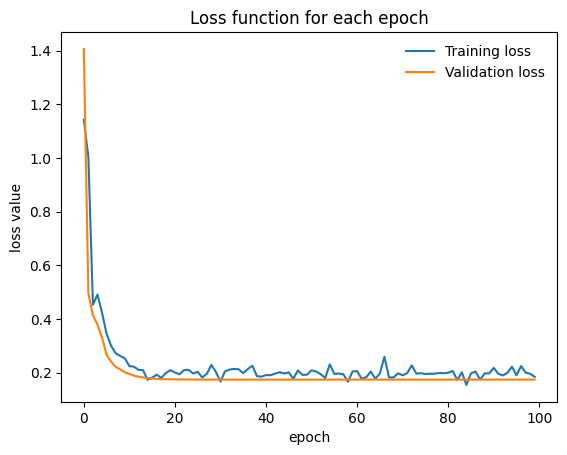

In [ ]:
#Training and validation loss
plt.plot(train_loss, label='Training loss')
plt.plot(valid_loss, label='Validation loss')

plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.title("Loss function for each epoch") 
plt.show()

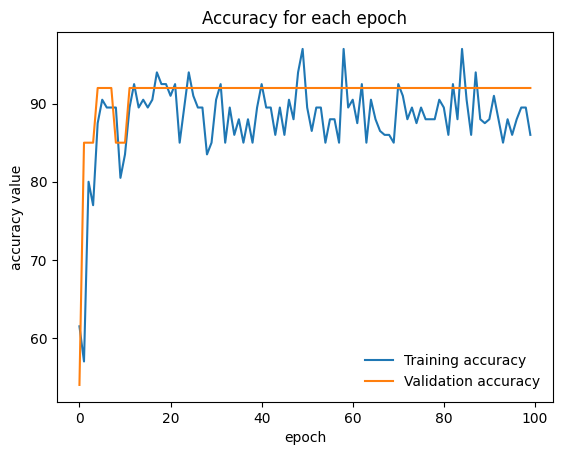

In [ ]:
#Training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(valid_acc, label='Validation accuracy')

plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('accuracy value')
plt.title("Accuracy for each epoch")
plt.show()

In [ ]:
print(f'training loss on last epoch : {train_loss[-1]}')
print(f'validation loss on last epoch : {valid_loss[-1]}')
print('-'*20)
print(f'training accuracy on last epoch : {train_acc[-1]}')
print(f'validation accuracy on last epoch : {valid_acc[-1]}')
     

training loss on last epoch : 0.18401511013507843
validation loss on last epoch : 0.17395837604999542
--------------------
training accuracy on last epoch : 86.0
validation accuracy on last epoch : 92.0


In [ ]:
num_class =2
classes = ['0', '1']

y_pred_testae, y_actual_test = test(ae_mlp, test_loader)

accuracy of network on the 1 data is : 90.0
Accuracy of 0: 100.0 %
Accuracy of 1: 75.0 %


In [ ]:
y_pred_testae = np.array([t.numpy() for t in y_pred_testae])

y_pred_testae , np.array(y_actual_test)

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1.]))

In [ ]:
print(classification_report(y_actual_test, y_pred_testae))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92         6
         1.0       1.00      0.75      0.86         4

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [ ]:
confusion_matrix(y_actual_test, y_pred_testae)

array([[6, 0],
       [1, 3]])